## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv("mail_data.csv")

X = dataset.iloc[:, -1].values
y = dataset.iloc[:, 0].values

In [50]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [51]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
# Replace the null values with a null string
dataset = dataset.where((pd.notnull(dataset)),'') 

## Label Encoding 

In [53]:
# Labelencoding the 'Category' column

# Label Encoding is used to convert the categorical labels (Spam, Ham) into numerical values (0, 1).
# This is necessary because most machine learning algorithms, including Logistic Regression, require input data to be in numerical form.
# By converting the labels into binary values, the model can effectively learn the distinction between the two classes during training.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# ham = 1, spam = 0
y = 1 - y

In [54]:
y

array([1, 1, 0, ..., 1, 1, 1])

## Splitting the dataset into the Training set and Test set

In [55]:
# Splitting the dataset into training and test sets is essential for evaluating the performance of the model.
# The training set is used to fit the model, allowing it to learn patterns from the data.
# The test set, which the model has not seen during training, is used to assess how well the model generalizes to unseen data.
# This split helps in detecting overfitting, ensuring that the model performs well not only on the training data but also on new, unseen emails.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

## Feature Extraction

In [56]:
# transform text data to feature vectors.

# TfidfVectorizer is used to convert text data into numerical features by calculating the Term Frequency-Inverse Document Frequency (TF-IDF).
# This method is chosen because it not only considers the frequency of words in the document (Term Frequency) but also penalizes common words
# that appear across many documents (Inverse Document Frequency). This helps in giving more importance to words that are more distinctive
# to a particular email and less importance to common words, making it a better choice for distinguishing between spam and non-spam emails.

from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

In [57]:
X_train = feature_extraction.fit_transform(X_train)
X_test = feature_extraction.transform(X_test)

## Training the Simple Logistic Regression model on the Training set

In [69]:
# Logistic Regression is chosen as the classification model because it is simple yet effective for binary classification tasks like spam detection.
# It provides probabilistic predictions, which can be helpful in understanding the confidence of the predictions. Additionally, Logistic Regression
# works well with high-dimensional data, such as the text features generated by TfidfVectorizer, and is less prone to overfitting when compared to more
# complex models. This makes it a strong baseline model for text classification problems.

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [68]:
# accuracy_score is used to measure the proportion of correctly predicted emails (both spam and ham) out of the total emails.

# The confusion matrix is chosen to provide a more detailed insight into the model's performance.
# It shows the breakdown of correct and incorrect predictions for each class (Spam and Ham).
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_train = regressor.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [60]:
accuracy_train

0.9676912721561588

In [61]:
y_pred_test = regressor.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [62]:
accuracy_test

0.9659192825112107

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[123  37]
 [  1 954]]


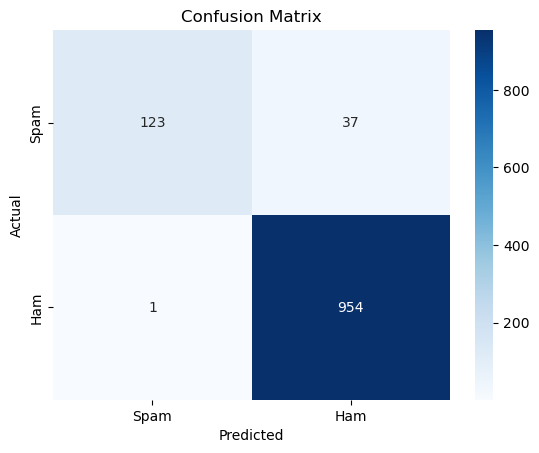

In [70]:
import seaborn as sns

# This confusion matrix visualizes the performance of our spam detection model.
# The x-axis represents the predicted labels, while the y-axis represents the actual labels.
# The matrix shows four key values:
# - Top-left (True Positives): The number of spam emails correctly classified as spam.
# - Top-right (False Negatives): The number of spam emails incorrectly classified as non-spam.
# - Bottom-left (False Positives): The number of non-spam emails incorrectly classified as spam.
# - Bottom-right (True Negatives): The number of non-spam emails correctly classified as non-spam.
# High values in the top-left and bottom-right cells indicate good performance, while high values in the top-right and bottom-left suggest areas for improvement.

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Building Predictive system

In [65]:
# you can change the input mail and get the predictions whether the mail is spam or ham
input_mail = ["Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!"]

input_Data_features = feature_extraction.transform(input_mail)

# making predictions
pred = regressor.predict(input_Data_features)

if pred[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail
